# Model estimation

In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
digits = datasets.load_digits()
features = digits.data
target = digits.target
standardizer = StandardScaler()
logit = LogisticRegression()
pipeline = make_pipeline(standardizer, logit)
kf = KFold(n_splits=10, shuffle=True, random_state=1)

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
cv_results = cross_val_score(pipeline,
                             features,
                             target,
                             cv=kf,
                             scoring="accuracy",
                             n_jobs=1)

In [5]:
cv_results.mean()

0.9693916821849783

In [6]:
cv_results  # estimation for each test-block  

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

In [7]:
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [8]:
boston = load_boston()
features, target = boston.data, boston.target

In [9]:
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)
dummy = DummyRegressor(strategy="mean")
dummy.fit(features_train, target_train)
dummy.score(features_test, target_test)

-0.001119359203955339

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
ols = LinearRegression()
ols.fit(features_train, target_train)
ols.score(features_test, target_test)

0.6354638433202114

In [12]:
from sklearn.dummy import DummyClassifier

In [13]:
iris = datasets.load_iris()
features, target = iris.data, iris.target
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)

In [14]:
dummy = DummyClassifier(strategy="uniform", random_state=1)
dummy.fit(features_train, target_train)
dummy.score(features_test, target_test)

0.42105263157894735

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
classifier = RandomForestClassifier()
classifier.fit(features_train, target_train)
classifier.score(features_test, target_test  )

0.9736842105263158

In [17]:
from sklearn.datasets import make_classification

In [18]:
X, y = make_classification(n_samples=10_000,
                           n_features=3,
                           n_informative=3,
                           n_redundant=0,
                           n_classes=2,
                           random_state=1)

In [19]:
logit = LogisticRegression()
cross_val_score(logit, X, y, scoring="accuracy")

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [20]:
cross_val_score(logit, X, y, scoring="precision")

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [21]:
cross_val_score(logit, X, y, scoring="recall")

array([0.951, 0.952, 0.953, 0.949, 0.951])

In [22]:
cross_val_score(logit, X, y, scoring="f1")

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [24]:
features, target = make_classification(n_samples=10_000,
                                       n_features=10,
                                       n_classes=2,
                                       n_informative=3,
                                       random_state=3)

In [25]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)
logit = LogisticRegression()
logit.fit(features_train, target_train)
target_probabilities = logit.predict_proba(features_test)[:,1]

In [26]:
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

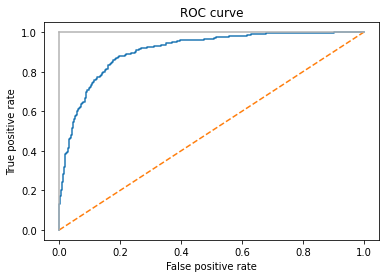

In [27]:
plt.title("ROC curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7")
plt.plot([1, 1], c=".7")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

In [28]:
print("Threshold:", threshold[116])
print("True positive:", true_positive_rate[116])
print("False positive", false_positive_rate[116])

Threshold: 0.5331715230155316
True positive: 0.810204081632653
False positive 0.14901960784313725


In [29]:
print("Threshold:", threshold[45])
print("True positive:", true_positive_rate[45])
print("False positive", false_positive_rate[45])

Threshold: 0.818913387665929
True positive: 0.5448979591836735
False positive 0.047058823529411764


In [30]:
roc_auc_score(target_test, target_probabilities)

0.9073389355742297

In [31]:
features, target = make_classification(n_samples=10_000,
                                       n_features=3,
                                       n_informative=3,
                                       n_redundant=0,
                                       n_classes=3,
                                       random_state=1)

In [32]:
logit = LogisticRegression()
cross_val_score(logit, features, target, scoring="accuracy")

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

In [33]:
cross_val_score(logit, features, target, scoring="f1_macro")

array([0.84061272, 0.82895312, 0.82625661, 0.81515121, 0.81992692])

In [34]:
cross_val_score(logit, features, target, scoring="f1_weighted")

array([0.84063166, 0.8289688 , 0.82630601, 0.8151928 , 0.81998327])

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

In [36]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
class_names = iris.target_names
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)

In [37]:
classifier = LogisticRegression()
target_predicted = classifier.fit(features_train, target_train).predict(features_test)
matrix = confusion_matrix(target_test, target_predicted)
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

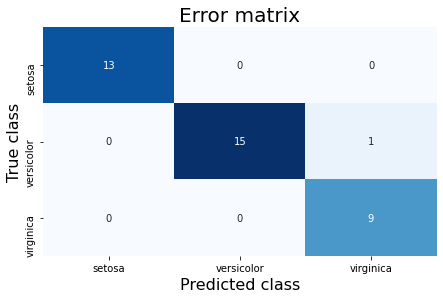

In [38]:
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Error matrix", fontsize=20)
plt.tight_layout()
plt.xlabel("Predicted class", fontsize=16)
plt.ylabel("True class", fontsize=16)
plt.show()

In [39]:
from sklearn.datasets import make_regression

In [40]:
features, target = make_regression(n_samples=100,
                                   n_features=3,
                                   n_informative=3,
                                   n_targets=1,
                                   noise=50,
                                   coef=False,
                                   random_state=1)

In [41]:
ols = LinearRegression()
cross_val_score(ols, features, target, scoring="neg_mean_squared_error")

array([           nan, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [42]:
cross_val_score(ols, features, target, scoring="r2")

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

In [43]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [44]:
features, _ = datasets.make_blobs(n_samples=1000,
                                  n_features=10,
                                  centers=2,
                                  cluster_std=0.5,
                                  shuffle=True,
                                  random_state=1)

In [45]:
model = KMeans(n_clusters=2, random_state=1).fit(features)
target_predicted = model.labels_
silhouette_score(features, target_predicted)

0.8916265564072142

In [46]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.linear_model import Ridge

In [47]:
features, target = make_regression(n_samples=100,
                                   n_features=3,
                                   random_state=1)

In [48]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.10, random_state=1)

In [49]:
def custom_metric(target_test, target_predicted):
    r2 = r2_score(target_test, target_predicted)
    return r2

In [50]:
score = make_scorer(custom_metric, greater_is_better=True)
classifier = Ridge()
model = classifier.fit(features_train, target_train)
score(model, features_test, target_test)

0.9997906102882058

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

In [52]:
digits = datasets.load_digits()
features, target = digits.data, digits.target

In [53]:
train_sizes, train_scores, test_scores = learning_curve(
                                         RandomForestClassifier(),
                                         features,
                                         target,
                                         cv=10,
                                         scoring="accuracy",
                                         n_jobs=-1,
                                         train_sizes=np.linspace(0.01, 1.0, 50))

In [54]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

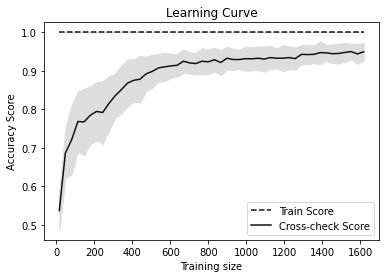

In [55]:
plt.plot(train_sizes, train_mean, "--", color="#111111", label="Train Score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-check Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.title("Learning Curve")
plt.xlabel("Training size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout
plt.show()

In [56]:
from sklearn.metrics import classification_report

In [57]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
class_names = iris.target_names

In [58]:
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)
classifier = LogisticRegression()
model = classifier.fit(features_train, target_train)
target_predicted = model.predict(features_test)

In [59]:
print(classification_report(target_test,
                            target_predicted,
                            target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

